In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
data = np.genfromtxt('winequality.csv', delimiter=',', names=True)

In [9]:
len(data.dtype)

13

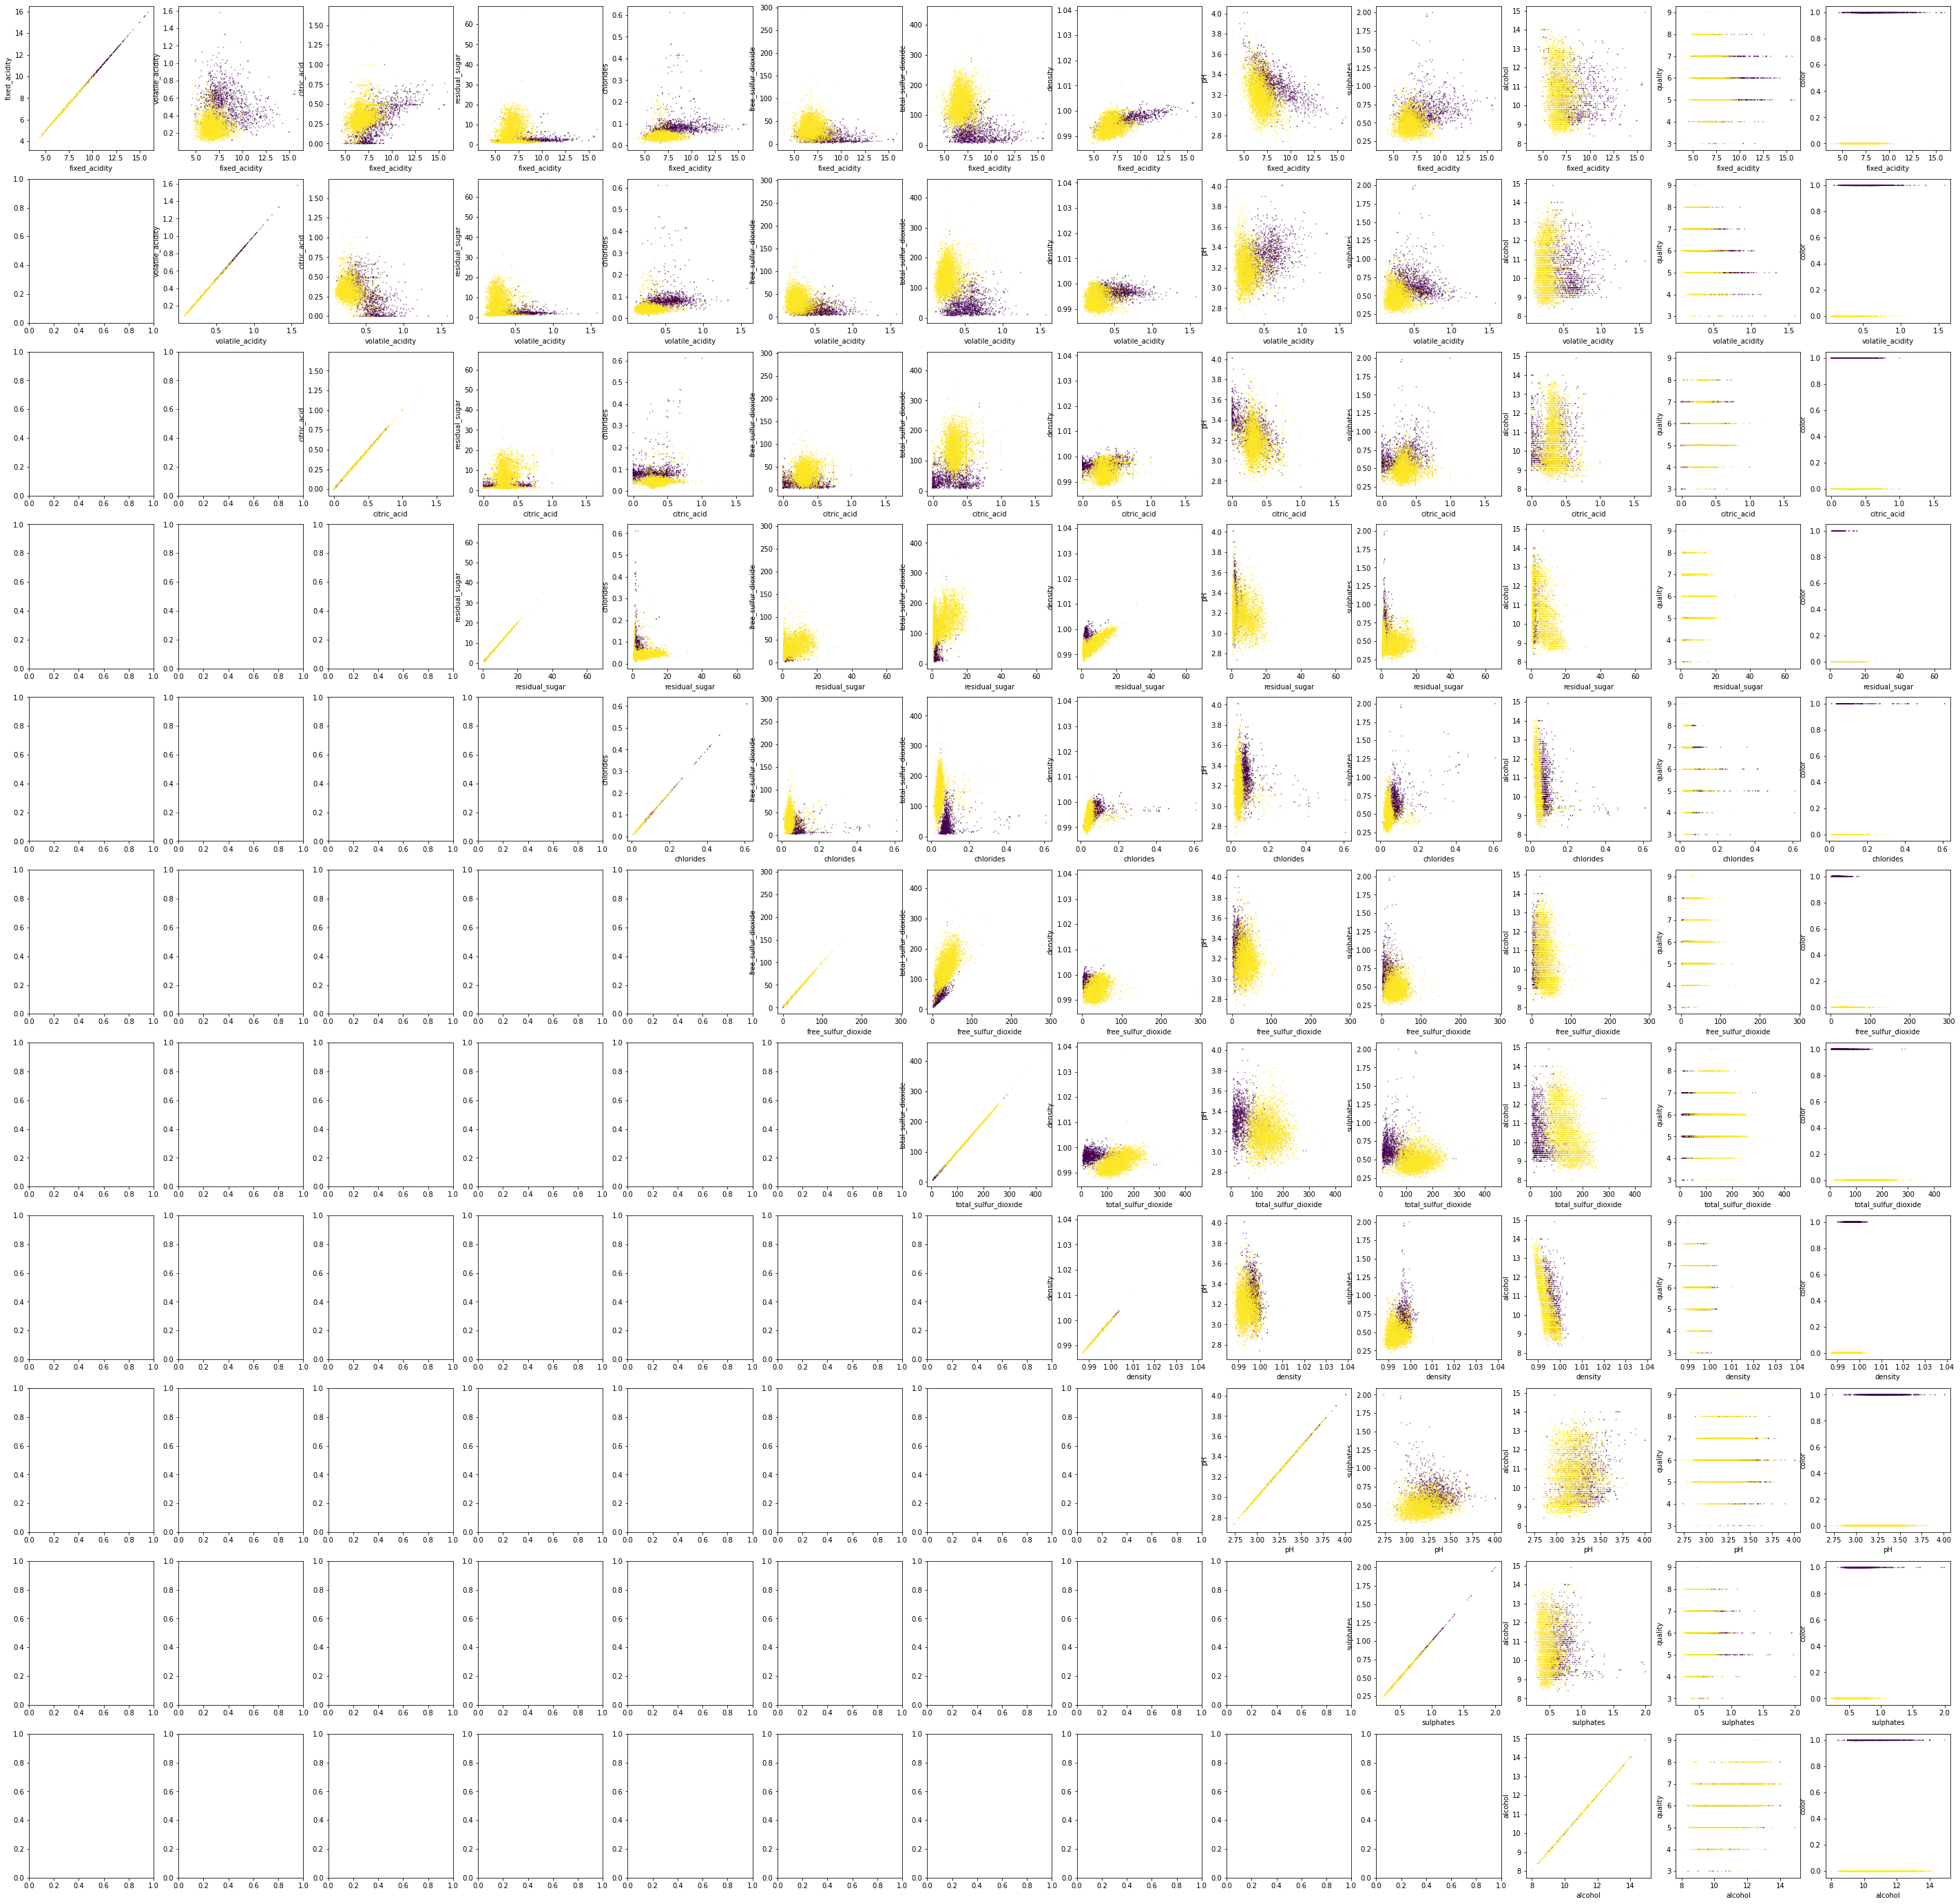

In [78]:
names = data.dtype.names

fig, axs = plt.subplots(len(names)-2, len(names), figsize=(50, 50))

for i, xname in enumerate(names[:-2]):
    for j, yname in enumerate(names[i:]):
        j = i + j
        axs[i, j].scatter(
            data[xname],
            data[yname],
            s=0.5,
            alpha=0.5,
            c=1-data['color']
        )
        axs[i, j].set_xlabel(xname)
        axs[i, j].set_ylabel(yname)

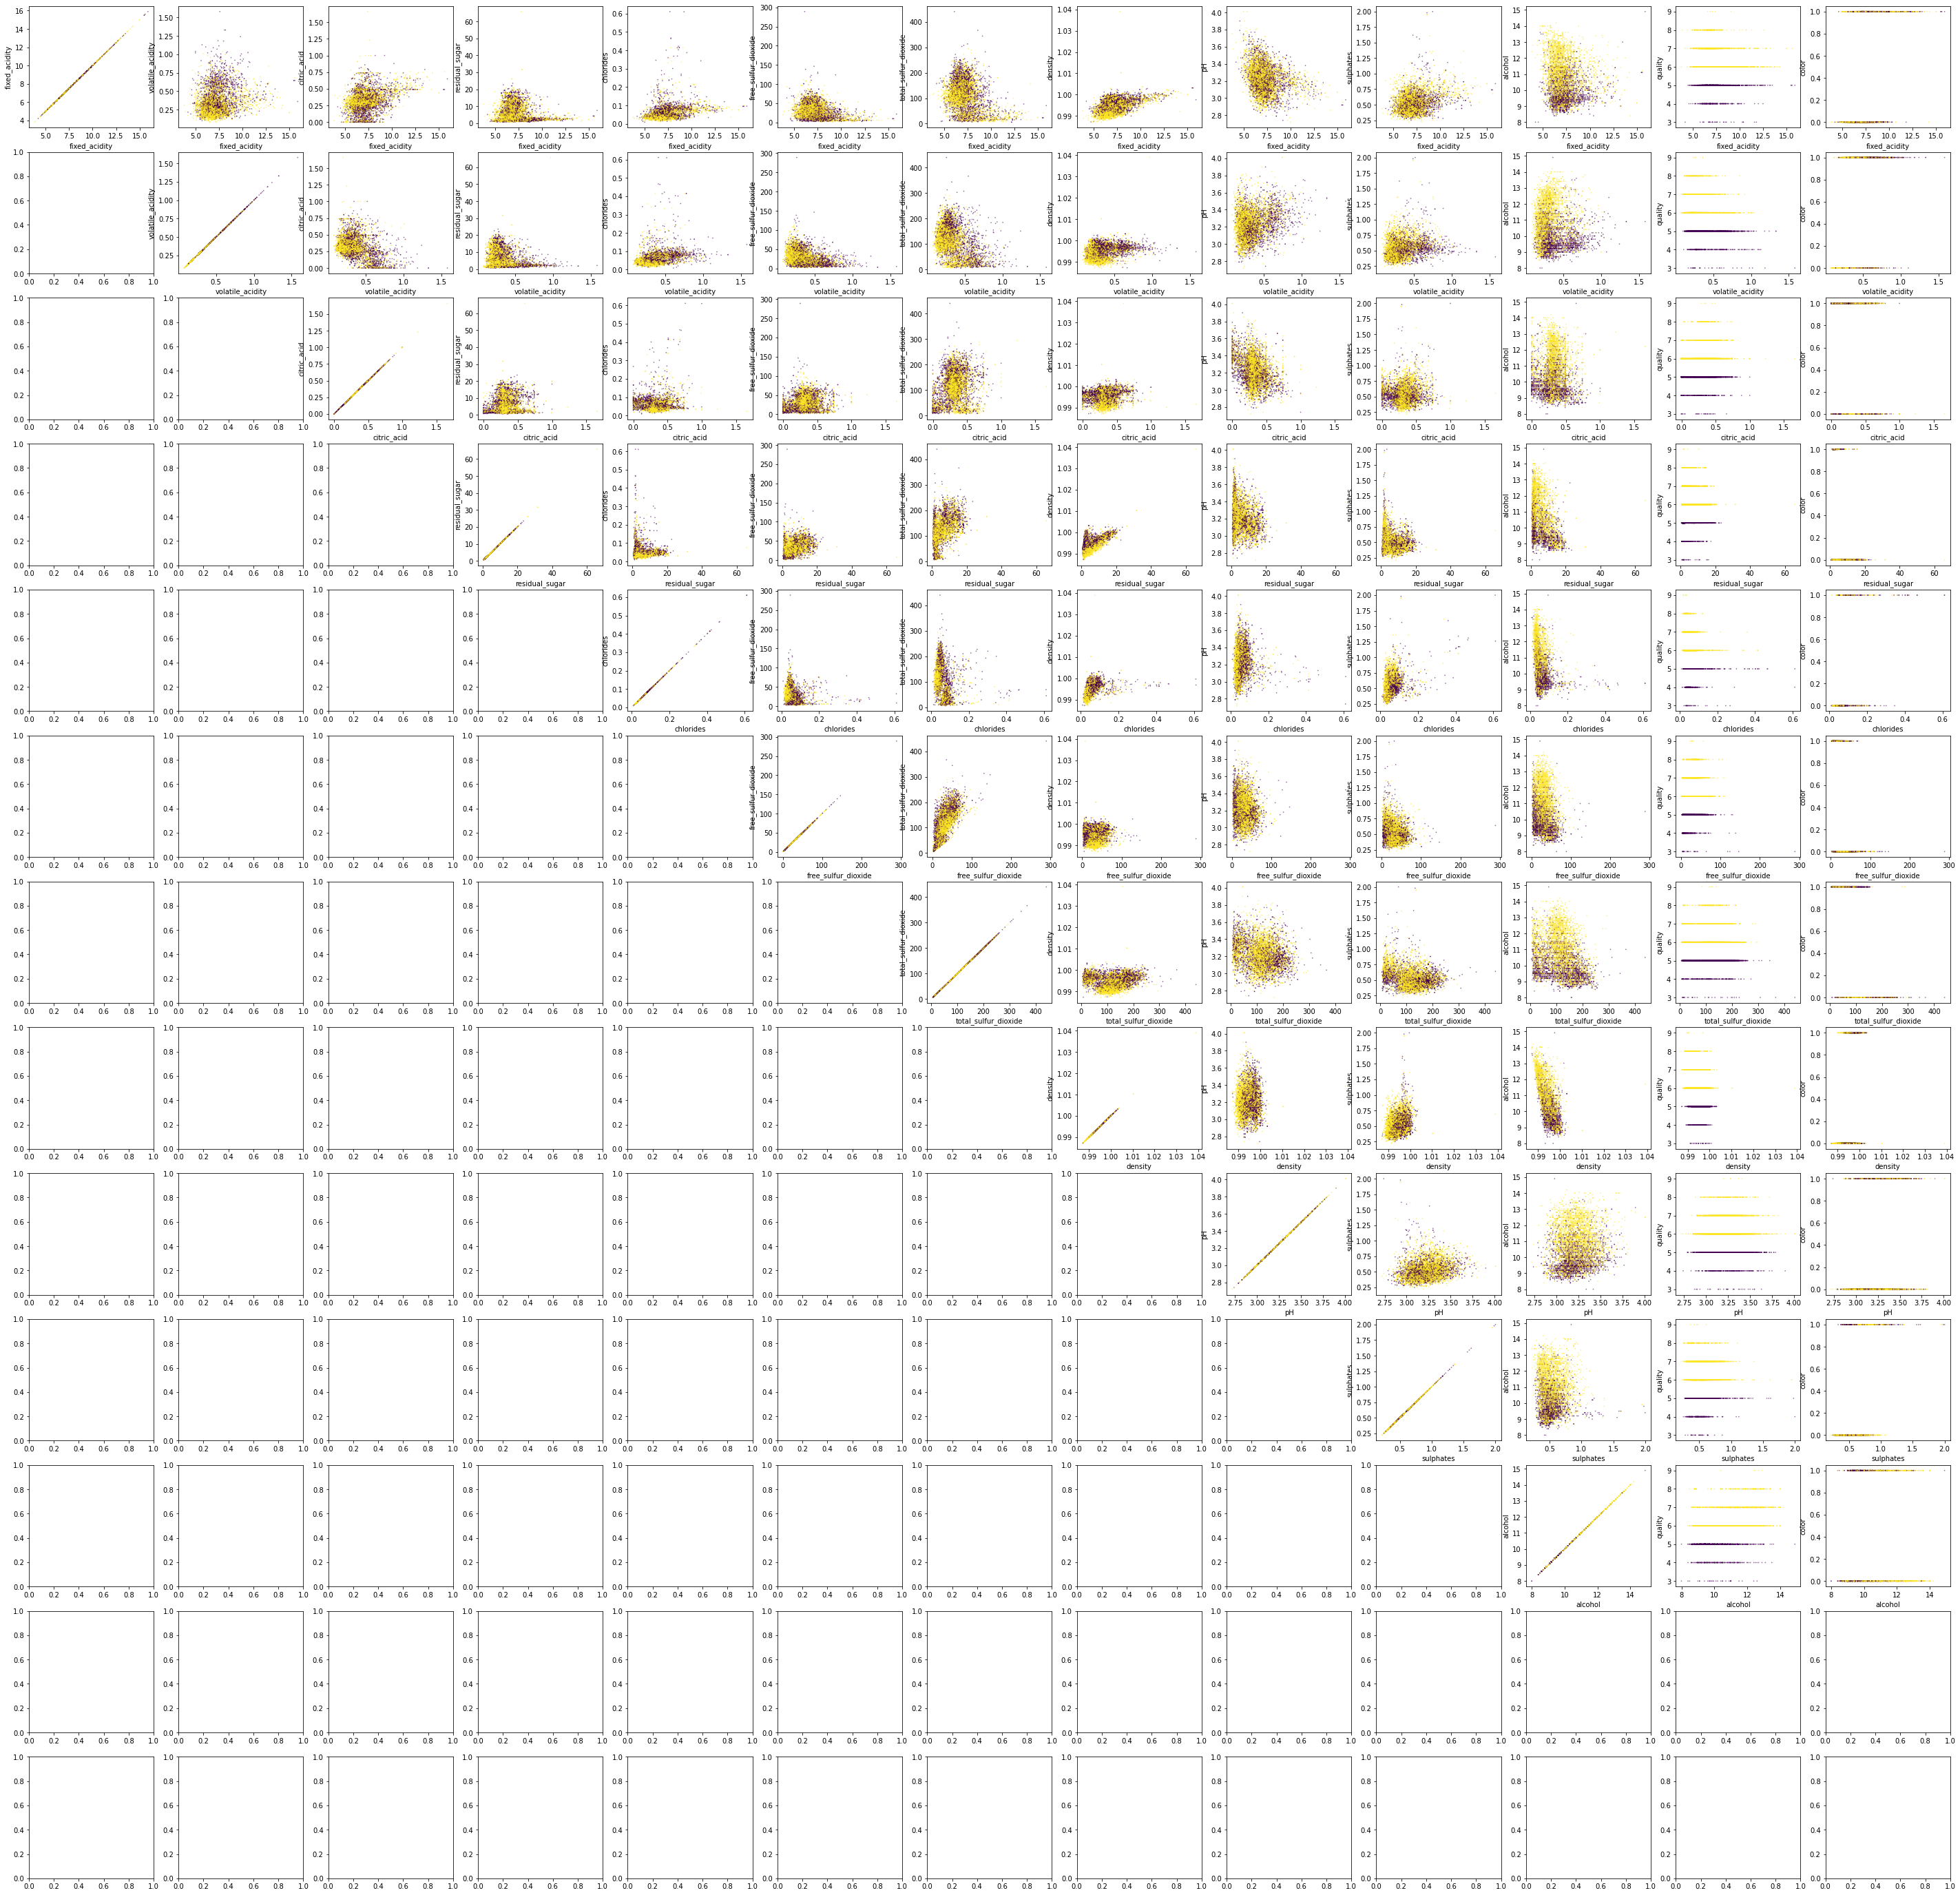

In [26]:
fig, axs = plt.subplots(len(names), len(names), figsize=(50, 50))

for i, xname in enumerate(names[:-2]):
    for j, yname in enumerate(names[i:]):
        j = i+j
        axs[i, j].scatter(
            data[xname],
            data[yname],
            s=0.5,
            alpha=0.5,
            c=data['quality']
        )
        axs[i, j].set_xlabel(xname)
        axs[i, j].set_ylabel(yname)

In [27]:
from mpl_toolkits import mplot3d

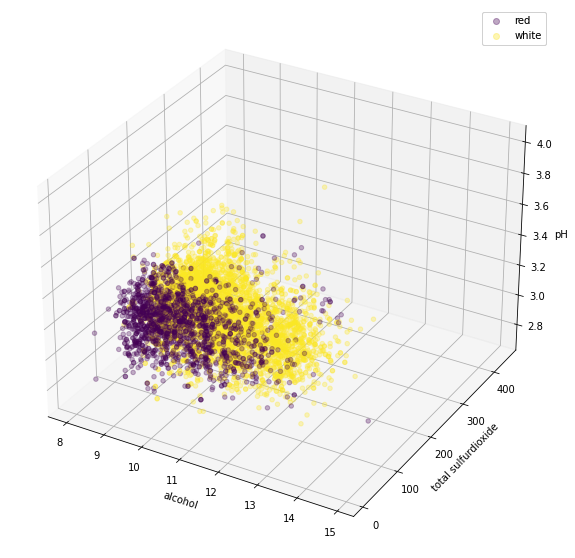

In [75]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(
        data['alcohol'],
        data['total_sulfur_dioxide'],
        data['pH'], 
        # s=10,
        alpha=0.3,
        c=1-data['color']
)
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfurdioxide')
ax.set_zlabel('pH')

ax.add_artist(ax.legend(scatter.legend_elements(prop='colors')[0], ['red', 'white']))

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [160]:
arr = data.view((float, len(data.dtype.names)))
x = arr[:, :-2]
y = arr[:, -1]

# no need to normalize inputs -- model regularizes by default
# x = (x - x.mean()) / x.std()

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [162]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [163]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.99


In [165]:
cm = metrics.confusion_matrix(y_test, logisticRegr.predict(x_test))
print(cm)

[[983   6]
 [  7 304]]


In [174]:
y2 = arr[:, -2]
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=0)
logisticRegr2 = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr2.fit(x2_train, y2_train)


/home/paulm/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [175]:
score = logisticRegr2.score(x2_test, y2_test)
print(score)

0.5230769230769231


In [177]:
cm = metrics.confusion_matrix(y2_test, logisticRegr2.predict(x2_test))
print(cm)

[[  0   0   4   3   0   0   0]
 [  0   0  33  15   0   0   0]
 [  0   0 230 182   1   0   0]
 [  0   0 127 419  33   0   0]
 [  0   0  10 170  31   0   0]
 [  0   0   2  29  10   0   0]
 [  0   0   0   1   0   0   0]]


In [178]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=